

You may use the MNIST dataset or any dataset for Face Images or Flower Images for this assignment. 

TASK 1) Implement k-means clustering. Analyse the clusters formed for various values of k. Display the centroids of the clusters. DO NOT USE IN_BUILT ROUTINE for k-means clustering. 

2) Implement Dimensionality reduction using PCA. Analyse the reconstruction error for various values of k. Display the Eigen Vectors. DO NOT USE IN_BUILT ROUTINE for implementing PCA. However you can use in-built routines for computing Eigen vectors and Eigen values. 

Note that when you apply PCA on images, you are dealing with data with a very high dimensionality, i.e. d>m, where m is the number of images in the training dataset. Therefore you need to apply the technique given in Section 23.1.1. of the Textbook. 

Further, for images, you have the red, green and blue components for the color at every pixel location. You can simply consider the average of the three color components. This average is the intensity value at the pixel. The feature vector is constructed using the intensity values of the all the pixels in the image. 

Prepare a report with all the results and steps of implementation. 

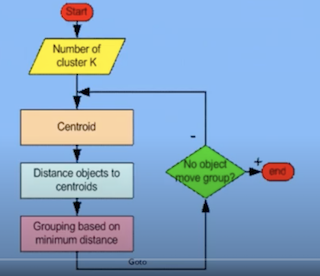

# Task 1 : 
1. Kmeans clustering
2. Clusters formed for diff K
3. centroids of the clusters

Dissimilar examples should be part of different clusters, Similar examples should be part of same cluster. K means tries to put the data into the number of clusters we tell it to. For a given K, randomly chose k data points to be the initial clyster centers, Assign each data point to each clyster center, Re Compute the cluster centers with previous clustering. If converging criteria does not met repeat again.

K means works through the following iterative process:
Pick a value for k (the number of clusters to create)
Initialize k ‘centroids’ (starting points) in your data
Create your clusters. Assign each point to the nearest centroid.
Make your clusters better. Move each centroid to the center of its cluster.
Repeat steps 3–4 until your centroids converge.

# Using Inbuilt Functions

Text(0, 0.5, 'Sepal Width')

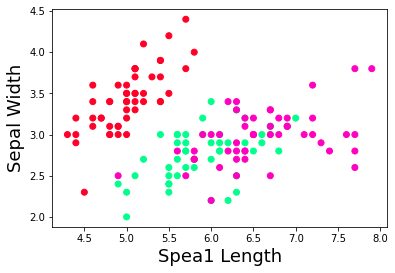

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [ ]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [ ]:
centers = km.cluster_centers_
print(centers)


[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


Text(0.5, 1.0, 'Predicted')

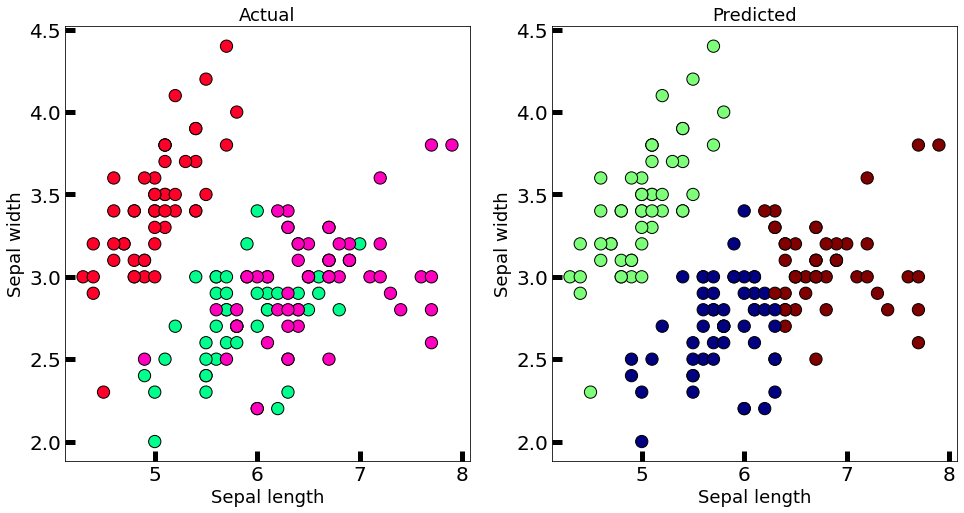

In [ ]:
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

# Not using Inbuilt Functions

Text(0, 0.5, 'Sepal Width')

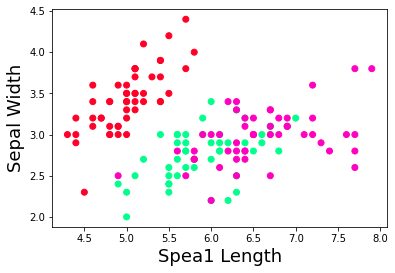

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

Let us define some basics to start the K means algorithm. There is a Threshold (theta) for movement of centroid in K means, total iterations define the max number of interations that the running algorithm takes place. The train/fit and predict functions will give the functionality of the K Means. The underlying difference between K Means and General Classification algorithms is that, in K Means we just focus whether we achieved the clusters which we targeted however in other clsutering algorithms we focus on more of finding how accurate the algorithm worked. Since it is unsupervised we have to use only training.


In [ ]:
k=4
theta = 0.01
tot_iter = 80
colors = 10*["g", "r", "b", "c", "k"]

def fit(data):
  centroids = {}
  for i in range(k):
    centroids[i]= data[i] 
    # That is first k=4 centroids will be the starting k=4 of the dataset
  for i in range(tot_iter):
    labels = {}
    for i in range(k):
      labels[i] = []
    # feature set in data    
    for fset in X:
      distances = [np.linalg.norm(fset-centroids[centroid]) for centroid in centroids]
      # Creating a list of distances where 0th element of the list will be
      # the distance to the 0th centroid with data elements.
      label = distances.index(min(distances)) # Classification
      labels[label].append(fset) # Says that feature set belongs to that centroid
    prev_centroids = dict(centroids)
    for label in labels:
      pass
      # centroids[label] = np.average(labels[label], axis=0)
      # Taking avergae of all the labels we have and assigning the centroid with that label
      # Finds the centroid for previous centroids labels
      # Finds the mean of all the features for any given class and redefines the centroid
    converged = True
    for clabel in centroids:
      original_centroid = prev_centroids[clabel]
      current_centroid = centroids[clabel]
      # Checking for the threshold theta by which the centroid should take movements
      if np.sum((current_centroid - original_centroid)/original_centroid * 100) > theta:
        converged = False
    if converged:
      break
  for centroid in centroids:
    plt.scatter(centroids[centroid][0], centroids[centroid][1], marker="o", color="k", s=150, linewidths=5)

  for label in labels:
    color = colors[label]
    for fset in labels[label]:
      plt.scatter(fset[0], fset[1], marker="x", color=color, s=150, linewidths=5)
def predict(data):
  distances = [np.linalg.norm(data-centroids[centroid]) for centroid in centroids]
  label = distances.index(min(distance)) 
  return label


# OLD CENTROIDS

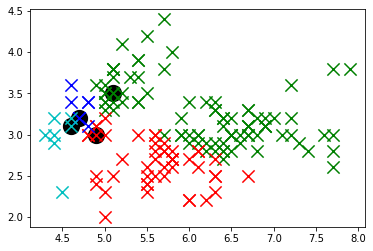

In [ ]:
fit(X)


In [ ]:
k=4
theta = 0.01
tot_iter = 80
colors = 10*["g", "r", "b", "c", "k"]

def fit(data):
  centroids = {}
  for i in range(k):
    centroids[i]= data[i] 
    # That is first k=4 centroids will be the starting k=4 of the dataset
  for i in range(tot_iter):
    labels = {}
    for i in range(k):
      labels[i] = []
    # feature set in data    
    for fset in X:
      distances = [np.linalg.norm(fset-centroids[centroid]) for centroid in centroids]
      # Creating a list of distances where 0th element of the list will be
      # the distance to the 0th centroid with data elements.
      label = distances.index(min(distances)) # Classification
      labels[label].append(fset) # Says that feature set belongs to that centroid
    prev_centroids = dict(centroids)
    for label in labels:
      # pass
      centroids[label] = np.average(labels[label], axis=0)
      # Taking avergae of all the labels we have and assigning the centroid with that label
      # Finds the centroid for previous centroids labels
      # Finds the mean of all the features for any given class and redefines the centroid
    converged = True
    for clabel in centroids:
      original_centroid = prev_centroids[clabel]
      current_centroid = centroids[clabel]
      # Checking for the threshold theta by which the centroid should take movements
      if np.sum((current_centroid - original_centroid)/original_centroid * 100) > theta:
        converged = False
    if converged:
      break
  for centroid in centroids:
    plt.scatter(centroids[centroid][0], centroids[centroid][1], marker="o", color="k", s=150, linewidths=5)

  for label in labels:
    color = colors[label]
    for fset in labels[label]:
      plt.scatter(fset[0], fset[1], marker="x", color=color, s=150, linewidths=5)


# NEW CENTROIDS

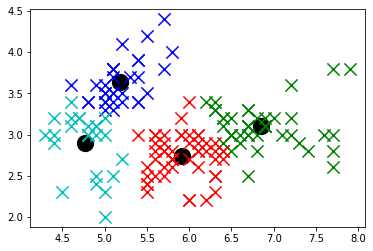

In [ ]:
fit(X)


Note that some points which are classified green previouslt, are now classified according to the nearest centroid

Lets try with smaller and larger cluster for values k=2 and k=6

# K=2

In [ ]:
k=2
theta = 0.01
tot_iter = 80
colors = 10*["g", "r", "b", "c", "k"]

def fit(data):
  centroids = {}
  for i in range(k):
    centroids[i]= data[i] 
    # That is first k=4 centroids will be the starting k=4 of the dataset
  for i in range(tot_iter):
    labels = {}
    for i in range(k):
      labels[i] = []
    # feature set in data    
    for fset in X:
      distances = [np.linalg.norm(fset-centroids[centroid]) for centroid in centroids]
      # Creating a list of distances where 0th element of the list will be
      # the distance to the 0th centroid with data elements.
      label = distances.index(min(distances)) # Classification
      labels[label].append(fset) # Says that feature set belongs to that centroid
    prev_centroids = dict(centroids)
    for label in labels:
      pass
      # centroids[label] = np.average(labels[label], axis=0)
      # Taking avergae of all the labels we have and assigning the centroid with that label
      # Finds the centroid for previous centroids labels
      # Finds the mean of all the features for any given class and redefines the centroid
    converged = True
    for clabel in centroids:
      original_centroid = prev_centroids[clabel]
      current_centroid = centroids[clabel]
      # Checking for the threshold theta by which the centroid should take movements
      if np.sum((current_centroid - original_centroid)/original_centroid * 100) > theta:
        converged = False
    if converged:
      break
  for centroid in centroids:
    plt.scatter(centroids[centroid][0], centroids[centroid][1], marker="o", color="k", s=150, linewidths=5)

  for label in labels:
    color = colors[label]
    for fset in labels[label]:
      plt.scatter(fset[0], fset[1], marker="x", color=color, s=150, linewidths=5)
def predict(data):
  distances = [np.linalg.norm(data-centroids[centroid]) for centroid in centroids]
  label = distances.index(min(distance)) 
  return label


# K=2 plot

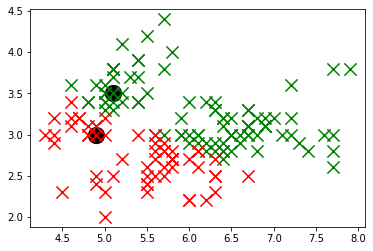

In [ ]:
fit(X)

# K=6

In [ ]:
k=6
theta = 0.01
tot_iter = 80
colors = 10*["g", "r", "b", "c", "k", "m"]

def fit(data):
  centroids = {}
  for i in range(k):
    centroids[i]= data[i] 
    # That is first k=4 centroids will be the starting k=4 of the dataset
  for i in range(tot_iter):
    labels = {}
    for i in range(k):
      labels[i] = []
    # feature set in data    
    for fset in X:
      distances = [np.linalg.norm(fset-centroids[centroid]) for centroid in centroids]
      # Creating a list of distances where 0th element of the list will be
      # the distance to the 0th centroid with data elements.
      label = distances.index(min(distances)) # Classification
      labels[label].append(fset) # Says that feature set belongs to that centroid
    prev_centroids = dict(centroids)
    for label in labels:
      pass
      # centroids[label] = np.average(labels[label], axis=0)
      # Taking avergae of all the labels we have and assigning the centroid with that label
      # Finds the centroid for previous centroids labels
      # Finds the mean of all the features for any given class and redefines the centroid
    converged = True
    for clabel in centroids:
      original_centroid = prev_centroids[clabel]
      current_centroid = centroids[clabel]
      # Checking for the threshold theta by which the centroid should take movements
      if np.sum((current_centroid - original_centroid)/original_centroid * 100) > theta:
        converged = False
    if converged:
      break
  for centroid in centroids:
    plt.scatter(centroids[centroid][0], centroids[centroid][1], marker="o", color="k", s=150, linewidths=5)

  for label in labels:
    color = colors[label]
    for fset in labels[label]:
      plt.scatter(fset[0], fset[1], marker="x", color=color, s=150, linewidths=5)
def predict(data):
  distances = [np.linalg.norm(data-centroids[centroid]) for centroid in centroids]
  label = distances.index(min(distance)) 
  return label


# K=6 Plot

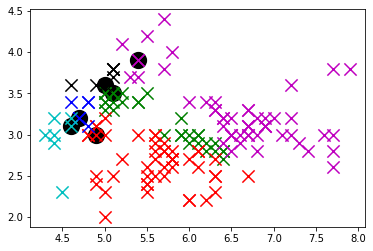

In [ ]:
fit(X)

Note that for K=6 it is wrose than k=4

# K-Means : A Try with MNIST dataset

In [ ]:
# Import the MNIST dataset
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))


Training Data: (60000, 28, 28)
Training Labels: (60000,)


In [ ]:
print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))


Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


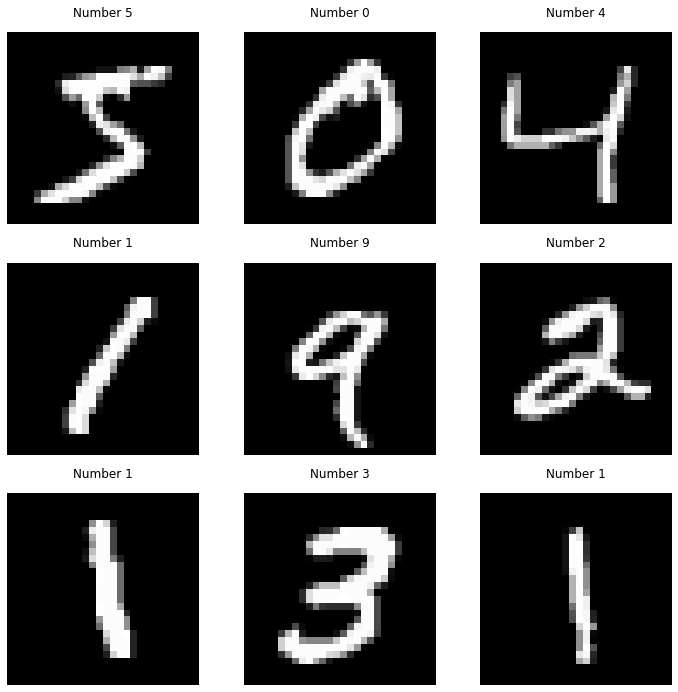

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('Number {}'.format(y_train[i]))

fig.show()

In [ ]:
# convert each image to 1 dimensional array

In [ ]:
X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1 One hot

X = X.astype(float) / 255. 

print(X.shape)
print(X[0].shape)


(60000, 784)
(784,)


# Getting Failed when trying to run method fit(X) which is defined in earlier sections
The Error is expected to come since it is very large computation

In [ ]:
k=10
theta = 0.01
tot_iter = 80
colors = 10*["g", "r", "b", "c", "k", "m", "y", "w"]

def fit(data):
  centroids = {}
  for i in range(k):
    centroids[i]= data[i] 
    # That is first k=4 centroids will be the starting k=4 of the dataset
  for i in range(tot_iter):
    labels = {}
    for i in range(k):
      labels[i] = []
    # feature set in data    
    for fset in X:
      distances = [np.linalg.norm(fset-centroids[centroid]) for centroid in centroids]
      # Creating a list of distances where 0th element of the list will be
      # the distance to the 0th centroid with data elements.
      label = distances.index(min(distances)) # Classification
      labels[label].append(fset) # Says that feature set belongs to that centroid
    prev_centroids = dict(centroids)
    for label in labels:
      # pass
      centroids[label] = np.average(labels[label], axis=0)
      # Taking avergae of all the labels we have and assigning the centroid with that label
      # Finds the centroid for previous centroids labels
      # Finds the mean of all the features for any given class and redefines the centroid
    converged = True
    for clabel in centroids:
      original_centroid = prev_centroids[clabel]
      current_centroid = centroids[clabel]
      # Checking for the threshold theta by which the centroid should take movements
      if np.sum((current_centroid - original_centroid)/original_centroid * 100) > theta:
        converged = False
    if converged:
      break
  for centroid in centroids:
    plt.scatter(centroids[centroid][0], centroids[centroid][1], marker="o", color="k", s=150, linewidths=5)

  for label in labels:
    color = colors[label]
    for fset in labels[label]:
      plt.scatter(fset[0], fset[1], marker="x", color=color, s=150, linewidths=5)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


KeyboardInterrupt: ignored

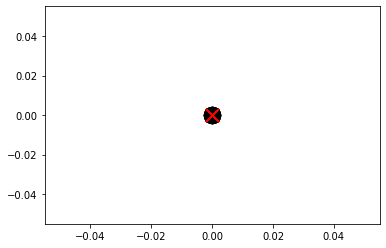

In [ ]:
fit(X)

# Use MiniBatchKmeans

*Due to the size of the MNIST dataset, we will use the mini-batch implementation of k-means clustering provided by scikit-learn. This will dramatically reduce the amount of time it takes to fit the algorithm to the data.* Ref: https://medium.com/datadriveninvestor/k-means-clustering-for-imagery-analysis-56c9976f16b6

In [ ]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)

# Initialize KMeans model

kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data

kmeans.fit(X)

kmeans.labels_

10


array([6, 7, 3, ..., 6, 5, 9], dtype=int32)

In [ ]:
def infer_cluster_labels(kmeans, actual_labels):
  inferred_labels = {}

  for i in range(kmeans.n_clusters):

      # find index of points in cluster
      labels = []
      index = np.where(kmeans.labels_ == i)

      # append actual labels for each point in cluster
      labels.append(actual_labels[index])

      # determine most common label
      if len(labels[0]) == 1:
          counts = np.bincount(labels[0])
      else:
          counts = np.bincount(np.squeeze(labels))

      # assign the cluster to a value in the inferred_labels dictionary
      if np.argmax(counts) in inferred_labels:
          # append the new number to the existing array at this slot
          inferred_labels[np.argmax(counts)].append(i)
      else:
          # create a new array in this slot
          inferred_labels[np.argmax(counts)] = [i]

      #print(labels)
      #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
      
  return inferred_labels

In [ ]:

def infer_data_labels(X_labels, cluster_labels):
    # empty array of len(X)
  predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

  for i, cluster in enumerate(X_labels):
      for key, value in cluster_labels.items():
          if cluster in value:
              predicted_labels[i] = key
              
  return predicted_labels


In [ ]:

cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print (predicted_labels[:20])
print (Y[:20])


[7 0 4 1 7 2 1 2 1 6 3 1 3 6 1 7 2 1 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [ ]:
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, Y)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# display the figure
fig.show()

# PCA

In [ ]:
# Again load mnist, standardize 
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))


Training Data: (60000, 28, 28)
Training Labels: (60000,)


4


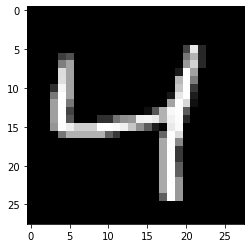

In [ ]:
plt.imshow(x_train[2])
print(y_train[2])

In [ ]:
X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1 One hot

X = X.astype(float) / 255. 

print(X.shape)
print(X[0].shape)
print(Y.shape)


(60000, 784)
(784,)
(60000,)


In [ ]:
new_labels = Y[0:15000]
new_data = X[0:15000]
print('the shape of sample data: '+ str(new_data.shape))

the shape of sample data: (15000, 784)


In [ ]:
covar_matrix = np.matmul(new_data.T, new_data)
print(covar_matrix.shape)

(784, 784)


In [ ]:
# From scipy.linearalgebra we can have pre built libs of eigen value and eigen vectors
from scipy.linalg import eigh
# Higest eigen values and vectors
# eigh returns values in ascending order
values, vectors = eigh(covar_matrix, eigvals=(782,783)) 
vectors = vectors.T
print(vectors.shape)

(2, 784)


In [ ]:
final_coordinates = np.matmul(vectors,new_data.T)

In [ ]:
print(final_coordinates.shape)
# (2X784) X (784X15000)

(2, 15000)


In [ ]:
new_labels.shape

(15000,)

In [ ]:
# Adding labels
final_coordinates = np.vstack((final_coordinates, new_labels)).T
df = pd.DataFrame(data=final_coordinates, columns=("PC1","PC2", "label"))
print(df.head())

        PC1       PC2  label
0 -0.272273  6.483883    5.0
1  3.545998  6.941575    0.0
2  1.478622  3.166248    4.0
3 -3.305616  4.144610    1.0
4 -1.533636  5.880873    9.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


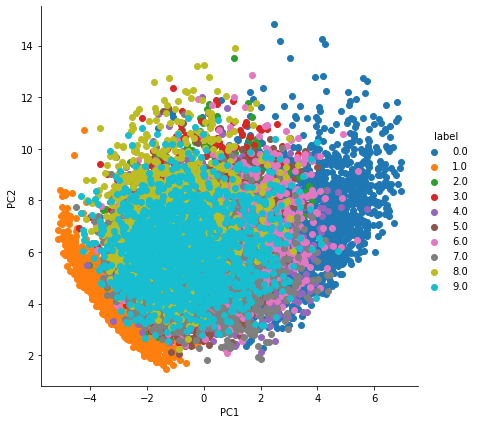

In [ ]:
import seaborn as sb
sb.FacetGrid(df, hue="label", size=6).map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()

Note that labels 0 (dark blue) and 1 (orange) are completely separated. Moreover, we have just transformed our 784D dataset in 2D plane. Great!

In [ ]:
# Now using PCA / Prebuilt function
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(new_data)
print(pca_data.shape)

(15000, 2)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


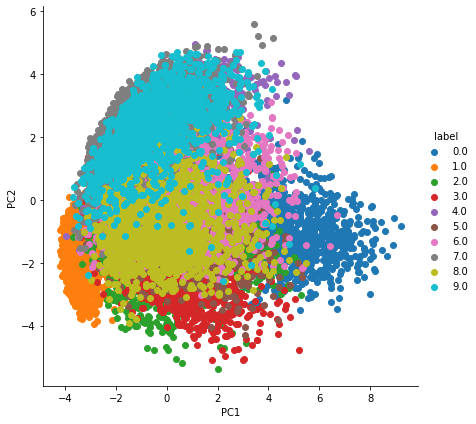

In [ ]:
# Putting to vertical stack
pca_data = np.vstack((pca_data.T, new_labels)).T
pca_dataframe = pd.DataFrame(data=pca_data, columns=("PC1","PC2", "label"))
sb.FacetGrid(pca_dataframe, hue="label", size=6).map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()